In [44]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import collections
from matplotlib import image
import sys

from math import *;

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

import numpy as np
import geom
import matplotlib.image as image
import matplotlib.pyplot as plt
import importlib
import sonalleve
import transducers
#from matplotlib.mlab import griddata

import matplotlib.transforms as mpl_trans

import scipy.interpolate as snt
import scipy.ndimage.filters as sflt
import scipy.special as sci
from scipy import ndimage
import scipy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import MRDataAnalysis
from MRDataAnalysis import rescale as rescaleIm

import PBHE_CUDA
import nibabel
import visvis as vv
#os.chdir('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\path_optimization\\')

%matplotlib inline
np.set_printoptions(precision=4, suppress=True, threshold=1300)

plt.rc('font', family='sans-serif', size=20)

%matplotlib inline

In [45]:
c0=1540
k0=1.2e6*2*pi/c0

rho = 1000;
Cp = 3700
Cv = Cp*rho
ktherm = 0.6


In [46]:
D=ktherm/Cv
dt=0.1
dx=0.00031
dz=0.001
D*(dt/dx**2 + dt/dx**2 + dt/dz**2 )

0.35370250583570045

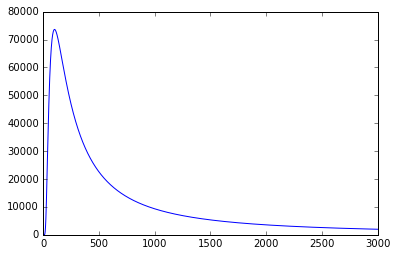

In [42]:
ttt=np.arange(0.2,3000,0.05) 
plt.plot(ttt, np.exp(-0.0001 / (4.0*D*ttt) ) / ((4*pi*D*ttt)**(3.0/2.0)) )

In [48]:


uxyz = sonalleve.get_sonalleve_xdc_vecs()
unvec= sonalleve.get_sonalleve_xdc_normals()


dataType=np.float32

RSkeys=dict(subsampN=10, ROC=0.14, subsampDiam=0.0066, gpublocks=512)

pp0 = transducers.calc_pressure_field_cuda(k0, uxyz, unvec, np.ones([256])/256, 
                        np.arange(-0.002,0.002,0.0005), np.arange(-0.002,0.002,0.0005), 0.14 + np.arange(-0.03,0.03,0.0005), **RSkeys)  
Ip0 = np.abs(pp0)**2 / (2.0*rho*c0)
Ispta0 = 1.0e7
powRenorm = (Ispta0/np.max(Ip0))

In [51]:
sx=1e-2*np.arange(-0.4,.4,0.01)
sy=np.zeros_like(sx)
sz=0.14*np.ones_like(sx)
amp=sqrt(powRenorm)*np.ones([256])/256
ddxcm=.3
#amp=transducers.get_focused_element_vals(k0, uxyz, 1e-2*np.array([[-ddxcm/2,0,14],[ddxcm/2,0,14]]), np.ones(2), L1renorm=sqrt(powRenorm) )
pfocX = transducers.calc_pressure_profile_cuda(k0,uxyz,unvec, amp, sx,sy,sz, **RSkeys)
IfocX=np.abs(pfocX)**2/(2*rho*c0)

sx_mm=sx*1000
Ifunc_mm=snt.interp1d(sx_mm, IfocX,fill_value=0.0,bounds_error=False)
ddxIf = snt.interp1d(sx_mm, scipy.misc.derivative(Ifunc_mm,sx_mm,dx=0.1),fill_value=0.0,bounds_error=False)
d2dx2If = snt.interp1d(sx_mm, scipy.misc.derivative(ddxIf,sx_mm,dx=0.1),fill_value=0.0,bounds_error=False)


In [85]:
geom.ring(0.008,MM,z=0.14)[0]

array([[ 0.004 ,  0.    ,  0.14  ],
       [-0.002 ,  0.0035,  0.14  ],
       [-0.002 , -0.0035,  0.14  ]])

In [99]:
d2dx2If(0)

array(-8370642.928424408)

In [62]:
np.mean(IfocX[np.logical_and(sx_mm>-3, sx_mm<3)])/np.max(IfocX)

0.23292709156620825

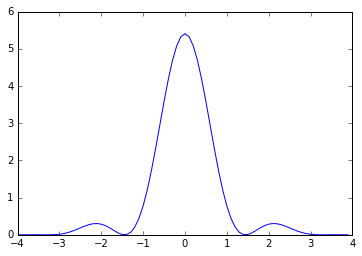

In [52]:

alpha=1.0

plt.plot(sx_mm, 2*alpha*Ifunc_mm(sx_mm)/(Cp*rho))
#plt.plot(sx_mm, ddxIf(sx_mm))
#plt.plot(sx_mm, (ktherm/Cp*rho)*d2dx2If(sx_mm),'r')

In [53]:
plt.plot(Ifunc(sx))

NameError: name 'Ifunc' is not defined

In [40]:

dxcm = 0.01
dycm = 0.01
dzcm = 0.1



xx= 1e-2*np.arange(-1.0,1.0, dxcm, dtype=dataType)
yy= 1e-2*np.arange(-1.0,1.0, dycm, dtype=dataType)

mx,my=np.meshgrid( xx, yy, indexing='ij' )

MM=3

uuu = transducers.get_focused_element_vals(k0, uxyz, geom.ring(0.008,MM,z=0.14)[0], np.ones(MM), L1renorm=sqrt(powRenorm) )
uuu2 = transducers.get_focused_element_vals(k0, uxyz, geom.ring(0.008,MM,z=0.14)[0], np.ones(MM)*np.exp(1j*np.arange(0,MM)*pi), L1renorm=sqrt(powRenorm) )
ppfplane0 = transducers.calc_pressure_field_cuda(k0, uxyz, unvec, sqrt(powRenorm)*np.ones([256])/256, xx, yy, [0.14], **RSkeys)  
ppfplane1 = transducers.calc_pressure_field_cuda(k0, uxyz, unvec, uuu, xx, yy, [0.14], **RSkeys)  
ppfplane2 = transducers.calc_pressure_field_cuda(k0, uxyz, unvec, uuu2, xx, yy, [0.14], **RSkeys)  

Ifp0 = np.abs(ppfplane0.squeeze())**2 / (2.0*rho*c0)
Ifp1 = np.abs(ppfplane1.squeeze())**2 / (2.0*rho*c0)
Ifp2 = np.abs(ppfplane2.squeeze())**2 / (2.0*rho*c0)



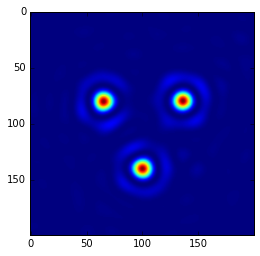

In [41]:
plt.imshow(Ifp2)

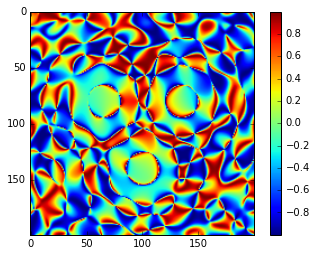

In [42]:
plt.imshow( (Ifp1-Ifp2) / (Ifp1+Ifp2))
plt.colorbar()

In [331]:
def gauss1d(x,sigmaX,x0=0.0):
    return (1/(np.sqrt(2*pi)*sigmaX)) * ( np.exp(-(x-x0)**2 / (2*sigmaX**2))  )
def gauss2d(x,y,sigmaX,sigmaY,x0=0.0,y0=0.0):
    return (1/(2*pi*sigmaX*sigmaY)) * ( np.exp(-(x-x0)**2 / (2*sigmaX**2))  *  np.exp(-(y-y0)**2 / (2*sigmaY**2))    )



kpx= 1e-2*np.arange(-0.5,0.5, dxcm, dtype=dataType)
kpy= 1e-2*np.arange(-0.5,0.5, dycm, dtype=dataType)

kmx,kmy=np.meshgrid( kpx, kpy, indexing='ij' )

gaussSmoothKern = gauss2d(kmx,kmy, 0.001, 0.001)*dxcm*dycm*1e-4

In [352]:

w_perfusionRate = 1e-3

#Nyborg parameterization
kappa = ktherm / (Cv);
tau = 1/w_perfusionRate

K = Cv*kappa
L = sqrt(kappa*tau)

dv=dxcm*dycm*dzcm*1e-6
qvdot_wattsPerVolume = 1000.0/dv
#C = qvdot_wattsPerVolume*dv/(8*pi*K)
C = 1/(8*pi*K)
def T(r,t):
    """
    Must multiply by source strength (in Watts)
    """
    tstar = np.sqrt(t/tau)
    R = r/np.sqrt(4*kappa*t)
    E = np.exp(-r/L)
    
    return (C/r)*(E*(2 - sci.erfc(tstar - R)) + (1/E)*sci.erfc(tstar + R) )

def Tss(r):
    E = np.exp(-r/L)
    return (2*C/r)*E

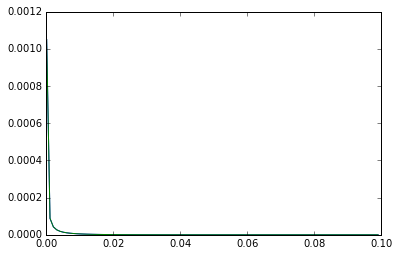

In [333]:
rr=np.arange(0.0001,0.1,0.001)
plt.plot( rr,gauss1d(rr,100.0)*Tss(rr)*np.max(2.0*alpha_acc*Ifp0)*dv )
plt.plot( rr,gauss1d(rr,100.0)*T(rr,10000)*np.max(2.0*alpha_acc*Ifp0)*dv )

In [140]:
alpha_acc=1.0

In [339]:
np.max(2.0*alpha_acc*Ifp0)*dv

0.0001999999999427511

In [365]:
rkm = np.sqrt(kmx**2 + kmy**2)
Tmodel = T(rkm, 100)*np.max(2.0*alpha_acc*Ifp0)*dv
#Tmodel[rkm<1e-4]=0

In [138]:
T(.001,100)

134878.24943058204

In [277]:
tau

999999999.9999999

In [218]:
(dxcm*dycm*1e-4)

1e-08

In [282]:
np.sum(Tmodel), np.sum(Tmodel2)

(3991729.7842757832, 3991734.0636604829)

In [342]:
(np.sum(Tmodel2) - np.sum(Tmodel))/np.abs(np.sum(Tmodel))

1.0721745126368305e-06

In [357]:
Tmodel2=ndimage.convolve(Tmodel, gaussSmoothKern)

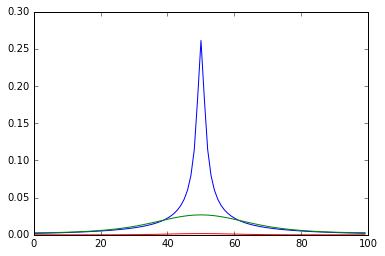

In [368]:
ri=49
plt.plot( Tmodel[ri,:])
plt.plot( Tmodel2[ri,:])
plt.plot( kernel[ri,:])

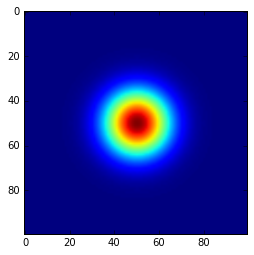

In [284]:
plt.imshow(Tmodel2 )

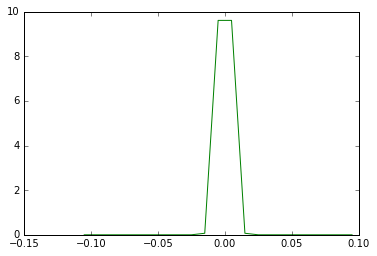

In [344]:
rr=  np.arange(-10.5*dxcm,10.5*dxcm,dxcm) 
plt.plot( rr, T(np.abs(rr),0.5))
plt.plot( rr, T(np.abs(rr),100))

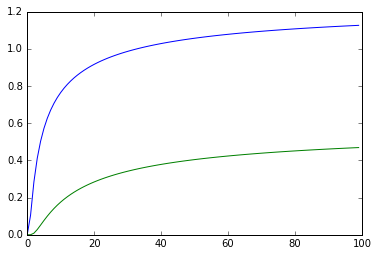

In [334]:
tt=np.arange(0,100)+0.001
plt.plot(tt, 10e-3*T(1e-3, tt))
plt.plot(tt, 10e-3*T(2e-3, tt))

In [338]:
10e-3*Tss(1.4e-3)

0.84872068132412937

In [360]:
Tkerna = T(rkm, 0.001)*np.max(2.0*alpha_acc*Ifp0)*dv
Tkernb = T(rkm, 1000)*np.max(2.0*alpha_acc*Ifp0)*dv
Tkerna[rkm<1e-4]=0
Tkernb[rkm<1e-4]=0

T0conv_a = ndimage.convolve(2.0*alpha_acc*dv*Ifp0, ndimage.convolve(Tkerna, gaussSmoothKern))
T0conv_b = ndimage.convolve(2.0*alpha_acc*dv*Ifp0, ndimage.convolve(Tkernb, gaussSmoothKern))

In [275]:
T1conv_a = ndimage.convolve(2.0*alpha_acc*dv*Ifp1,T(rkm, 0.0001))
norm=5.0 / np.max(T1conv_a)
T1conv_a *= norm

T1conv_b = ndimage.convolve(2.0*alpha_acc*dv*Ifp1,T(rkm, 1000))*norm

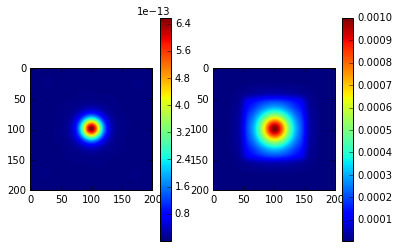

In [361]:
plt.subplot(121)
plt.imshow(T0conv_a)
plt.colorbar()
plt.subplot(122)
plt.imshow(T0conv_b - T0conv_a)
plt.colorbar()

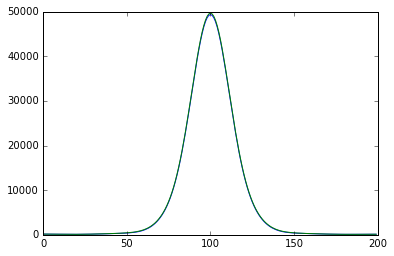

In [298]:
plt.plot(T0conv_a[100,:])
plt.plot(T0conv_b[100,:])

In [4]:
r = np.logspace( log10(0.01*L), log10(2*L),100)
t = np.logspace( log10(0.01*tau), log10(2*tau),100)



In [12]:
r = np.linspace( (0.01*L), (0.2*L),100)
t = np.linspace( (0.01*tau), (0.2*tau),100)


In [13]:
sqrt(powRenorm)

5550112.118775694

In [13]:


Tm = np.zeros([len(r),len(t)])
ti=0
for tq in t:
    ri=0
    for rq in r:
        Tm[ri,ti] = T(rq,tq)
        ri+=1
    ti+=1

gr,gt= np.meshgrid( r,t,sparse=False, indexing='ij' )




In [25]:
map( lambda r: T(r, 0.1), r)

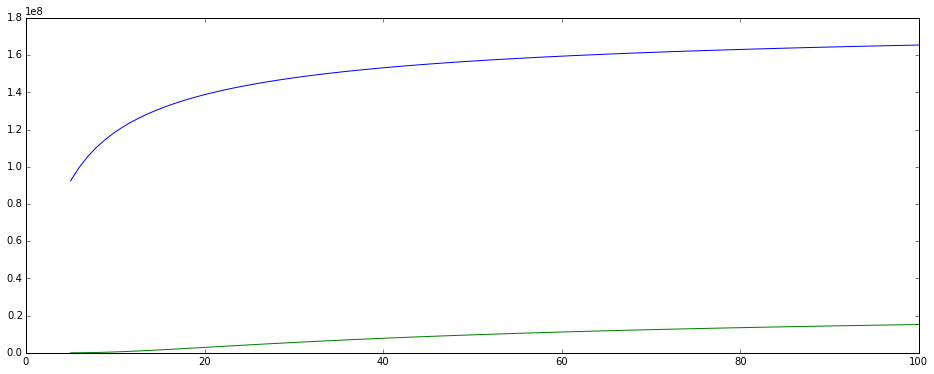

In [15]:
fig = plt.figure(figsize=(16,6), dpi=72)

plt.plot(t, list(map( lambda t: T(0.1*L, t), t)))
plt.plot(t, list(map( lambda t: T(0.5*L, t), t)))
plt.plot(t, list(map( lambda t: T(3*L, t), t)))


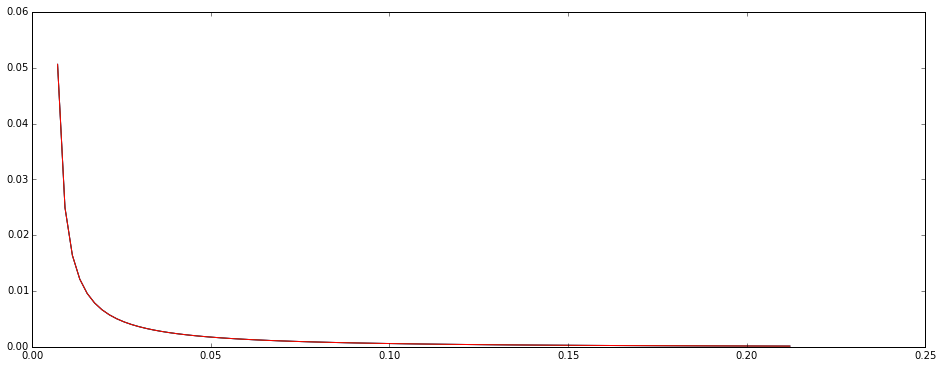

In [37]:
fig = plt.figure(figsize=(16,6), dpi=72)

plt.plot(r, list(map( lambda r: T(r, 0.1), t)))
plt.plot(r, list(map( lambda r: T(r, 8), t)))
plt.plot(r, list(map( lambda r: T(r, 10), t)))

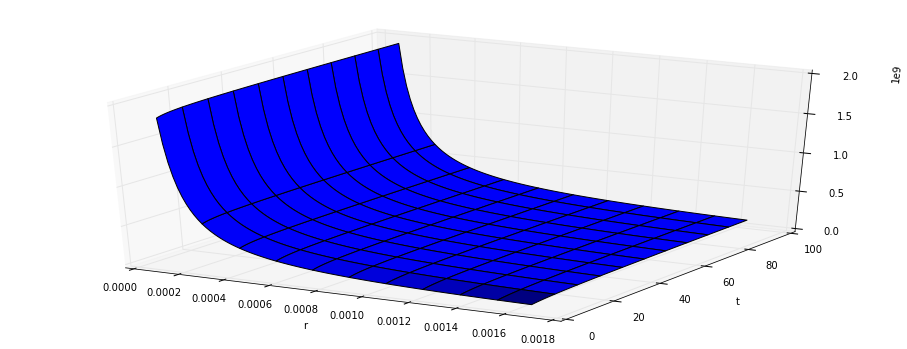

In [14]:
fig = plt.figure(figsize=(16,6), dpi=72)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface( gr, gt, Tm)
ax.set_xlabel('r')
ax.set_ylabel('t')

In [42]:
Tm.shape

(3, 2)

In [43]:
coords[0].shape

(2, 3)

In [24]:
T(0.01 , 10)

0.01844624957716989